# **Customer Invoice service churn**

This dataset represents a customer base from a company that sells a software to send invoice emails. It shows the usage given by its customers in terms of dates associated to the invoice and payments and categorical data describing specific details of the payment methods accepted by the customer's bussiness. In the next cells we'll be exploring the data to understand it and make decisions on how to treat it and prepare it for ML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pandasql import sqldf

pd.set_option('display.max_columns', None)
pysqldf = lambda q: sqldf(q, globals())

In [2]:
df=pd.read_csv('invoice_exploration - invoices_exploration_data_set.csv')
df

,INVOICE_ID,USER_TOKEN,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT,INVOICE_STATE,PAYER_CONTACT_TOKEN,CREATOR_EMPLOYEE_TOKEN,DELIVERY_METHOD,MERCHANT_INVOICE_NUMBER,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER
0,17022794,7GKHCN7QP5D8G,health_care_and_fitness,5342,1/28/2017,1/28/2017,NaN,PAID,X7Z9RP69413F55CKE9YTA8CT58,fFwHWd5duiWxfCOnXQGo,EMAIL,25,False,False,True,False
1,34647932,EG8FQS7KNVD3P,professional_services,13500,11/19/2017,11/19/2017,NaN,PAID,GBBVM4B46109X0ARGTD3X6W390,aO2jKsGfCbgsJtcygV7D,EMAIL,851,False,False,True,False
2,22039753,BPR4WEG6CKDA3,health_care_and_fitness,2731,5/2/2017,5/2/2017,NaN,UNPAID,Y7NHRCV1BD2EF2TRZ0A4QT5HVW,bbV7_DKYKxDe3_FYX_aH,EMAIL,52,False,False,True,False
3,25823986,94QD8N0C8XQKS,health_care_and_fitness,5530,7/7/2017,7/7/2017,NaN,PAID,4X05XCCEGX3J3FPNQARMZKQHT8,94QD8N0C8XQKS,EMAIL,136,False,False,True,False
4,23914162,8GV4XMBFTMTK9,health_care_and_fitness,2000,6/5/2017,6/5/2017,NaN,PAID,KH7ER8VVBS0675CT5TVB5QF3XC,8GV4XMBFTMTK9,EMAIL,12,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99493,34019064,CSP44P3EVHDV2,home_and_repair,6000,11/10/2017,11/10/2017,NaN,PAID,234Z9AWBH518KE1QC2FD6RDJJM,CSP44P3EVHDV2,EMAIL,79,False,False,True,False
99494,29713636,XHDZV7C59DT5N,home_and_repair,130000,9/9/2017,9/10/2017,NaN,PAID,RP5VF44MBD7S30FKEKCGZ3ZMT0,XHDZV7C59DT5N,EMAIL,Pat Comer,False,False,True,False
99495,29697557,BHX6PRB0JMQP8,health_care_and_fitness,23000,9/8/2017,9/8/2017,NaN,PAID,9ZSPE3XBY54RFF4248DCM2ANPC,g9-PCotWFXA_kXnCQY6e,EMAIL,9082017,False,False,True,False
99496,20067279,BHX6PRB0JMQP8,health_care_and_fitness,4500,3/29/2017,3/29/2017,NaN,PAID,NJVMJCYD311C3AP64290PGG36M,g9-PCotWFXA_kXnCQY6e,EMAIL,1092018,False,False,True,False


In [3]:
df.head()

,INVOICE_ID,USER_TOKEN,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT,INVOICE_STATE,PAYER_CONTACT_TOKEN,CREATOR_EMPLOYEE_TOKEN,DELIVERY_METHOD,MERCHANT_INVOICE_NUMBER,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER
0,17022794,7GKHCN7QP5D8G,health_care_and_fitness,5342,1/28/2017,1/28/2017,NaN,PAID,X7Z9RP69413F55CKE9YTA8CT58,fFwHWd5duiWxfCOnXQGo,EMAIL,25,False,False,True,False
1,34647932,EG8FQS7KNVD3P,professional_services,13500,11/19/2017,11/19/2017,NaN,PAID,GBBVM4B46109X0ARGTD3X6W390,aO2jKsGfCbgsJtcygV7D,EMAIL,851,False,False,True,False
2,22039753,BPR4WEG6CKDA3,health_care_and_fitness,2731,5/2/2017,5/2/2017,NaN,UNPAID,Y7NHRCV1BD2EF2TRZ0A4QT5HVW,bbV7_DKYKxDe3_FYX_aH,EMAIL,52,False,False,True,False
3,25823986,94QD8N0C8XQKS,health_care_and_fitness,5530,7/7/2017,7/7/2017,NaN,PAID,4X05XCCEGX3J3FPNQARMZKQHT8,94QD8N0C8XQKS,EMAIL,136,False,False,True,False
4,23914162,8GV4XMBFTMTK9,health_care_and_fitness,2000,6/5/2017,6/5/2017,NaN,PAID,KH7ER8VVBS0675CT5TVB5QF3XC,8GV4XMBFTMTK9,EMAIL,12,False,False,True,False


In [4]:
df.tail()

,INVOICE_ID,USER_TOKEN,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT,INVOICE_STATE,PAYER_CONTACT_TOKEN,CREATOR_EMPLOYEE_TOKEN,DELIVERY_METHOD,MERCHANT_INVOICE_NUMBER,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER
99493,34019064,CSP44P3EVHDV2,home_and_repair,6000,11/10/2017,11/10/2017,NaN,PAID,234Z9AWBH518KE1QC2FD6RDJJM,CSP44P3EVHDV2,EMAIL,79,False,False,True,False
99494,29713636,XHDZV7C59DT5N,home_and_repair,130000,9/9/2017,9/10/2017,NaN,PAID,RP5VF44MBD7S30FKEKCGZ3ZMT0,XHDZV7C59DT5N,EMAIL,Pat Comer,False,False,True,False
99495,29697557,BHX6PRB0JMQP8,health_care_and_fitness,23000,9/8/2017,9/8/2017,NaN,PAID,9ZSPE3XBY54RFF4248DCM2ANPC,g9-PCotWFXA_kXnCQY6e,EMAIL,9082017,False,False,True,False
99496,20067279,BHX6PRB0JMQP8,health_care_and_fitness,4500,3/29/2017,3/29/2017,NaN,PAID,NJVMJCYD311C3AP64290PGG36M,g9-PCotWFXA_kXnCQY6e,EMAIL,1092018,False,False,True,False
99497,35660365,AVTFZJ03ZNXPD,leisure_and_entertainment,10448,12/2/2017,12/5/2017,NaN,PAID,C4EXPGXJ9966B7G4DSCHMGYFZG,NaN,EMAIL,6,False,False,True,False


In [5]:
df.columns

Index(['INVOICE_ID', 'USER_TOKEN', 'BUSINESS_CATEGORY', 'INVOICE_AMOUNT_CENTS',
       'CREATED_AT', 'SENT_AT', 'CANCELLED_AT', 'INVOICE_STATE',
       'PAYER_CONTACT_TOKEN', 'CREATOR_EMPLOYEE_TOKEN', 'DELIVERY_METHOD',
       'MERCHANT_INVOICE_NUMBER', 'AUTOMATIC_REMINDERS_ENABLED',
       'BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED',
       'ACCEPTS_CREDIT_OR_DEBIT_CARD', 'ACCEPTS_BANK_TRANSFER'],
      dtype='object')

In [6]:

df['SENT_AT']=pd.to_datetime(df['SENT_AT'])
df['CREATED_AT']=pd.to_datetime(df['CREATED_AT'])
df['CANCELLED_AT']=pd.to_datetime(df['CANCELLED_AT'])

df.dtypes

INVOICE_ID                                         int64
USER_TOKEN                                        object
BUSINESS_CATEGORY                                 object
INVOICE_AMOUNT_CENTS                               int64
CREATED_AT                                datetime64[ns]
SENT_AT                                   datetime64[ns]
CANCELLED_AT                              datetime64[ns]
INVOICE_STATE                                     object
PAYER_CONTACT_TOKEN                               object
CREATOR_EMPLOYEE_TOKEN                            object
DELIVERY_METHOD                                   object
MERCHANT_INVOICE_NUMBER                           object
AUTOMATIC_REMINDERS_ENABLED                         bool
BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED              bool
ACCEPTS_CREDIT_OR_DEBIT_CARD                        bool
ACCEPTS_BANK_TRANSFER                               bool
dtype: object

In [7]:
df.describe()

,INVOICE_ID,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT
count,9.949800e+04,9.949800e+04,99498,99498,11934
mean,2.154460e+07,2.549260e+04,2017-03-23 00:21:46.880540416,2017-03-23 23:03:07.348489216,2017-06-19 11:57:20.051700736
min,2.313690e+05,1.000000e+02,2014-08-27 00:00:00,2016-01-01 00:00:00,2016-01-05 02:06:40
25%,1.434150e+07,3.622000e+03,2016-11-17 00:00:00,2016-11-18 00:00:00,2017-02-05 18:05:18.500000
50%,2.129237e+07,7.000000e+03,2017-04-20 00:00:00,2017-04-20 00:00:00,2017-06-15 14:20:48
75%,2.896672e+07,1.750000e+04,2017-08-29 00:00:00,2017-08-29 00:00:00,2017-10-26 14:47:34.249999872
max,3.747088e+07,5.000000e+06,2017-12-31 00:00:00,2017-12-31 00:00:00,2021-04-15 23:26:27
std,8.893294e+06,8.380104e+04,NaN,NaN,NaN


<Axes: >

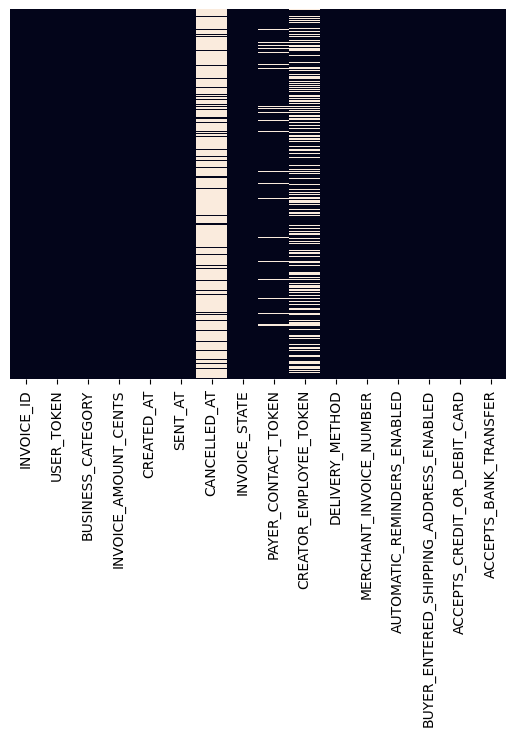

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [9]:
df.head()

,INVOICE_ID,USER_TOKEN,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,CREATED_AT,SENT_AT,CANCELLED_AT,INVOICE_STATE,PAYER_CONTACT_TOKEN,CREATOR_EMPLOYEE_TOKEN,DELIVERY_METHOD,MERCHANT_INVOICE_NUMBER,AUTOMATIC_REMINDERS_ENABLED,BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED,ACCEPTS_CREDIT_OR_DEBIT_CARD,ACCEPTS_BANK_TRANSFER
0,17022794,7GKHCN7QP5D8G,health_care_and_fitness,5342,2017-01-28,2017-01-28,NaT,PAID,X7Z9RP69413F55CKE9YTA8CT58,fFwHWd5duiWxfCOnXQGo,EMAIL,25,False,False,True,False
1,34647932,EG8FQS7KNVD3P,professional_services,13500,2017-11-19,2017-11-19,NaT,PAID,GBBVM4B46109X0ARGTD3X6W390,aO2jKsGfCbgsJtcygV7D,EMAIL,851,False,False,True,False
2,22039753,BPR4WEG6CKDA3,health_care_and_fitness,2731,2017-05-02,2017-05-02,NaT,UNPAID,Y7NHRCV1BD2EF2TRZ0A4QT5HVW,bbV7_DKYKxDe3_FYX_aH,EMAIL,52,False,False,True,False
3,25823986,94QD8N0C8XQKS,health_care_and_fitness,5530,2017-07-07,2017-07-07,NaT,PAID,4X05XCCEGX3J3FPNQARMZKQHT8,94QD8N0C8XQKS,EMAIL,136,False,False,True,False
4,23914162,8GV4XMBFTMTK9,health_care_and_fitness,2000,2017-06-05,2017-06-05,NaT,PAID,KH7ER8VVBS0675CT5TVB5QF3XC,8GV4XMBFTMTK9,EMAIL,12,False,False,True,False


In [10]:
df['month_year']=df['SENT_AT'].dt.strftime('%Y')+'-'+df['SENT_AT'].dt.strftime('%m')
df['month_year']=pd.to_datetime(df['month_year'])
df.dtypes

INVOICE_ID                                         int64
USER_TOKEN                                        object
BUSINESS_CATEGORY                                 object
INVOICE_AMOUNT_CENTS                               int64
CREATED_AT                                datetime64[ns]
SENT_AT                                   datetime64[ns]
CANCELLED_AT                              datetime64[ns]
INVOICE_STATE                                     object
PAYER_CONTACT_TOKEN                               object
CREATOR_EMPLOYEE_TOKEN                            object
DELIVERY_METHOD                                   object
MERCHANT_INVOICE_NUMBER                           object
AUTOMATIC_REMINDERS_ENABLED                         bool
BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED              bool
ACCEPTS_CREDIT_OR_DEBIT_CARD                        bool
ACCEPTS_BANK_TRANSFER                               bool
month_year                                datetime64[ns]
dtype: object

<Axes: title={'center': 'Amount per Invoice State'}, xlabel='month_year', ylabel='Amount'>

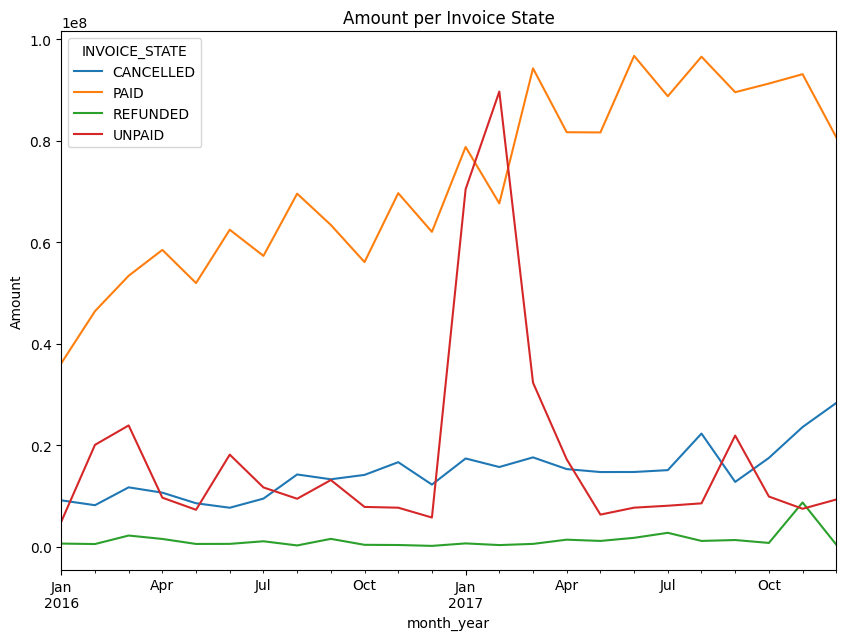

In [11]:
pivot = pd.pivot_table(df, values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='INVOICE_STATE', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Amount per Invoice State', ylabel='Amount')

<Axes: title={'center': 'Revenue per Business Category'}, xlabel='month_year', ylabel='Revenue'>

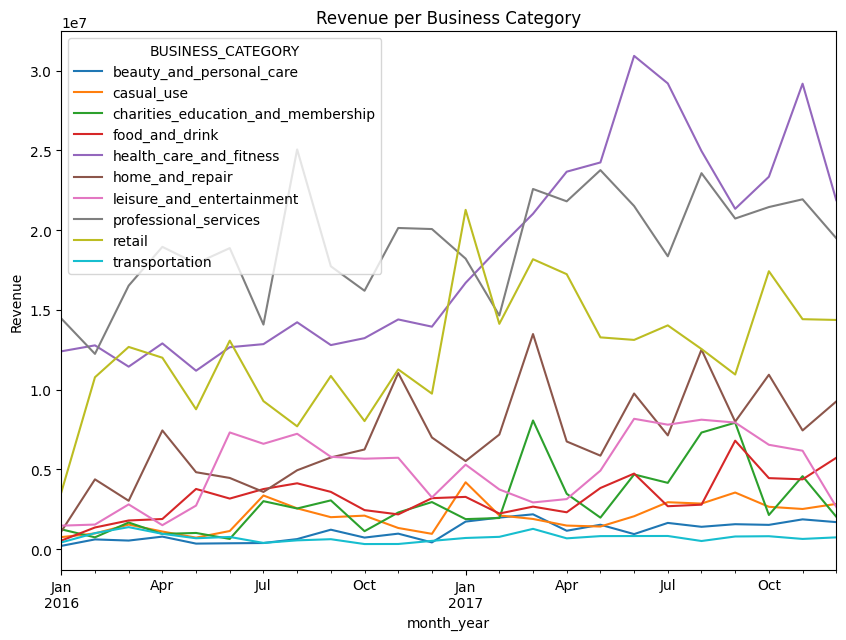

In [12]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='BUSINESS_CATEGORY', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Business Category', ylabel='Revenue')


<Axes: title={'center': 'Revenue per Delivery Method'}, xlabel='month_year', ylabel='Revenue'>

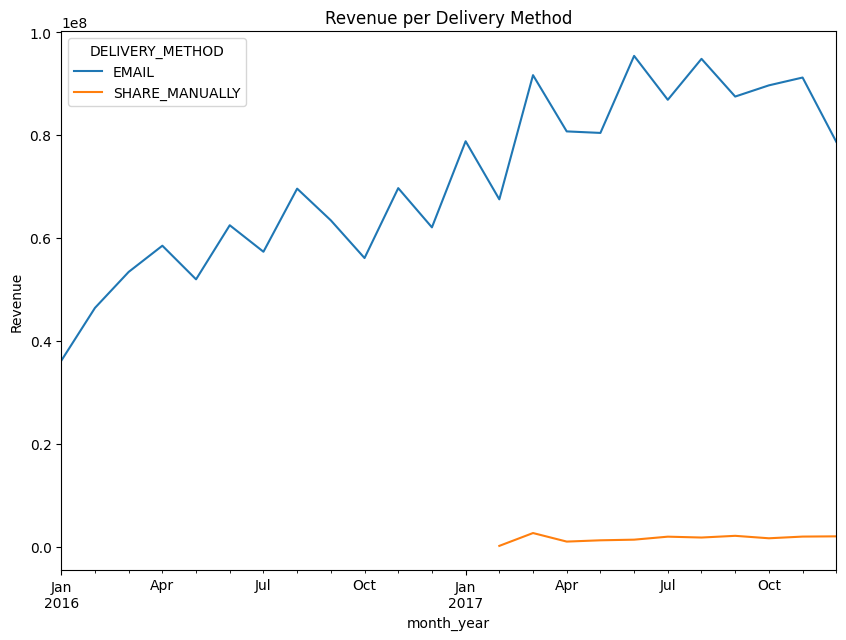

In [13]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='DELIVERY_METHOD', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Delivery Method', ylabel='Revenue')

<Axes: title={'center': 'Revenue per Automatic Reminder Status'}, xlabel='month_year', ylabel='Revenue'>

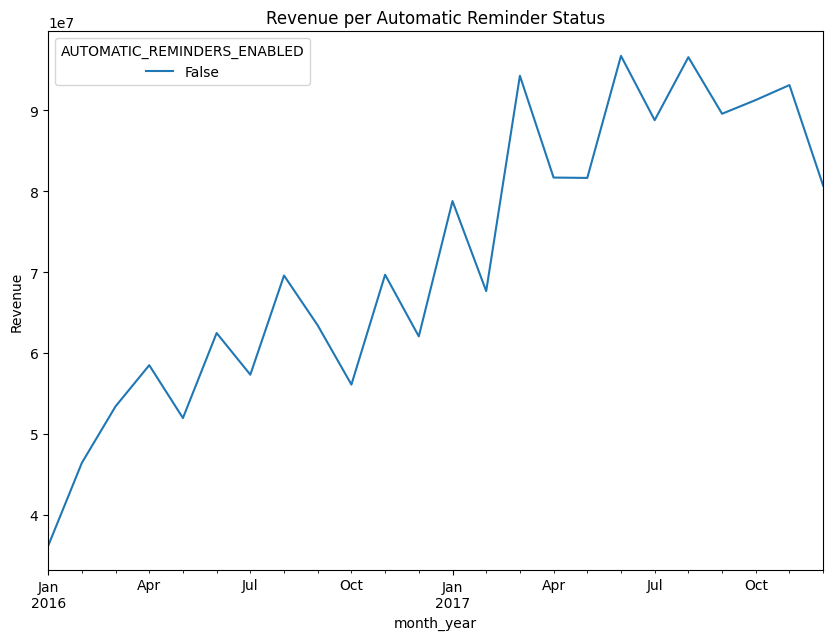

In [14]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='AUTOMATIC_REMINDERS_ENABLED', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Automatic Reminder Status', ylabel='Revenue')

<Axes: title={'center': 'Revenue per Entered Shipping Address Status'}, xlabel='month_year', ylabel='Revenue'>

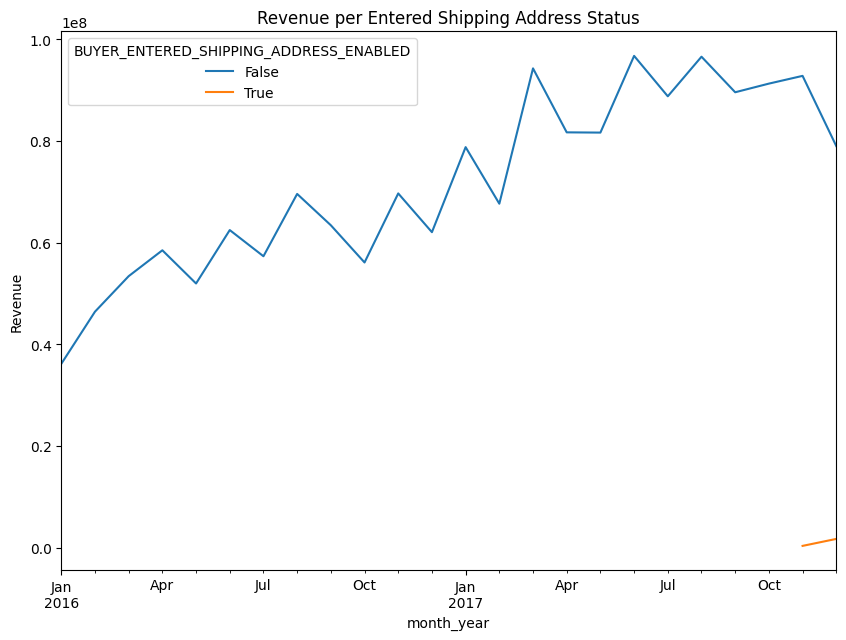

In [15]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Entered Shipping Address Status', ylabel='Revenue')

<Axes: title={'center': 'Revenue per Accepts Card Status'}, xlabel='month_year', ylabel='Revenue'>

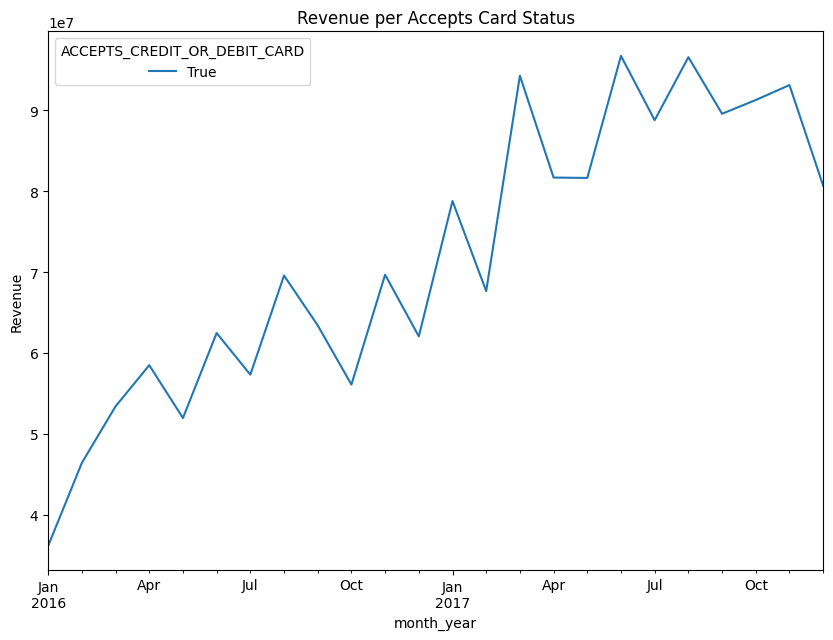

In [16]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='ACCEPTS_CREDIT_OR_DEBIT_CARD', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Accepts Card Status', ylabel='Revenue')

<Axes: title={'center': 'Revenue per Accepts Transfer Status'}, xlabel='month_year', ylabel='Revenue'>

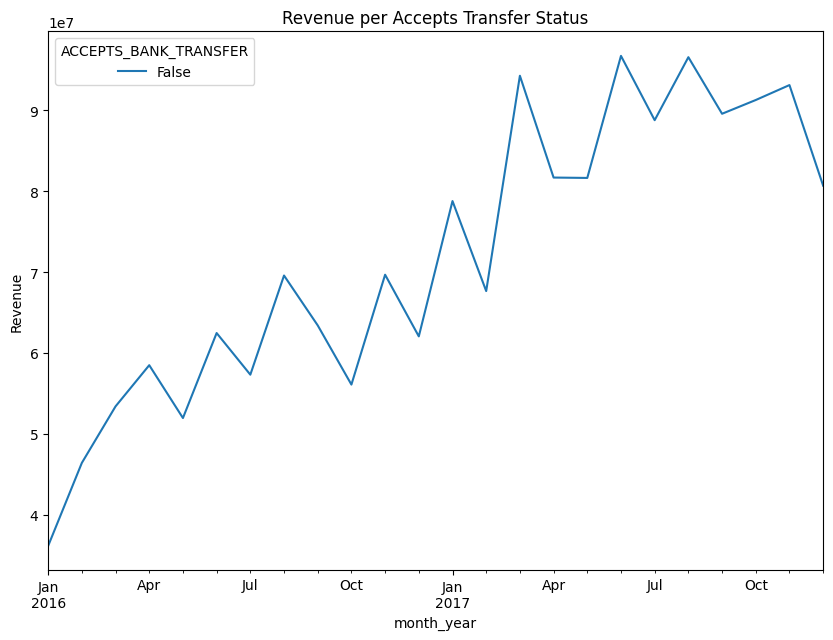

In [17]:
pivot = pd.pivot_table(df[df['INVOICE_STATE']=='PAID'], values='INVOICE_AMOUNT_CENTS', 
                                index='month_year', 
                                columns='ACCEPTS_BANK_TRANSFER', 
                                aggfunc=np.sum)
pivot.plot.line(figsize=(10,7), title='Revenue per Accepts Transfer Status', ylabel='Revenue')

From this quick exploration of how the revenue behaved according to the different catergorial and boolean variables we can conclude that the columns: 'DELIVERY_METHOD', 'AUTOMATIC_REMINDERS_ENABLED', 'BUYER_ENTERED_SHIPPING_ADDRESS_ENABLED', 'ACCEPTS_CREDIT_OR_DEBIT_CARD', 'ACCEPTS_BANK_TRANSFER' don´t contain meaningful information as they are always false or don´t impact Revenue behaivor.

It looks like the decrease in revenue the last month of 2017 is due churn within the 'health_care_and_fitness' business category.

Let's now generate the dataset which we'll use to develop new features that predict **churn, which we'll define as a user with no invoice in the last 60 days** (reason explained below).

In [18]:
df=df[['USER_TOKEN', 'INVOICE_ID','BUSINESS_CATEGORY', 'INVOICE_AMOUNT_CENTS',
       'SENT_AT','INVOICE_STATE']].copy()
df.drop_duplicates()

df

,USER_TOKEN,INVOICE_ID,BUSINESS_CATEGORY,INVOICE_AMOUNT_CENTS,SENT_AT,INVOICE_STATE
0,7GKHCN7QP5D8G,17022794,health_care_and_fitness,5342,2017-01-28,PAID
1,EG8FQS7KNVD3P,34647932,professional_services,13500,2017-11-19,PAID
2,BPR4WEG6CKDA3,22039753,health_care_and_fitness,2731,2017-05-02,UNPAID
3,94QD8N0C8XQKS,25823986,health_care_and_fitness,5530,2017-07-07,PAID
4,8GV4XMBFTMTK9,23914162,health_care_and_fitness,2000,2017-06-05,PAID
...,...,...,...,...,...,...
99493,CSP44P3EVHDV2,34019064,home_and_repair,6000,2017-11-10,PAID
99494,XHDZV7C59DT5N,29713636,home_and_repair,130000,2017-09-10,PAID
99495,BHX6PRB0JMQP8,29697557,health_care_and_fitness,23000,2017-09-08,PAID
99496,BHX6PRB0JMQP8,20067279,health_care_and_fitness,4500,2017-03-29,PAID


In [19]:
df['USER_TOKEN'].nunique()

3332

# **Feature Engineering**

We want a dataset that contains info about the users we've had in the last quarter because we want the model to be trained with recent behavior of our clients who are interacting with the same product. 
Because of lack of context, we don't know if the product has change little or not since jan-2016

In [22]:
query_features='''
with 
usr_arrival as (
select USER_TOKEN, first_invoice, first_amount, first_status from (
select USER_TOKEN, SENT_AT as first_invoice, INVOICE_AMOUNT_CENTS as first_amount, INVOICE_STATE as first_status,
row_number() over(partition by USER_TOKEN order by SENT_AT asc) as rk from df
) as first
where rk=1
),
usr_last as (
select USER_TOKEN, last_invoice, last_amount, last_status from (
select USER_TOKEN, SENT_AT as last_invoice, INVOICE_AMOUNT_CENTS as last_amount, INVOICE_STATE as last_status,
row_number() over(partition by USER_TOKEN order by SENT_AT desc) as rk from df
where SENT_AT < '2017-11-01'
) as first
where rk=1
),
usr_second_last as (
select USER_TOKEN, second_last_invoice, second_last_amount, second_last_status from (
select USER_TOKEN, SENT_AT as second_last_invoice, INVOICE_AMOUNT_CENTS as second_last_amount, INVOICE_STATE as second_last_status,
row_number() over(partition by USER_TOKEN order by SENT_AT desc) as rk from df
where SENT_AT < '2017-11-01'
) as second
where rk=2
),
agg_func_amount_hist as (
select USER_TOKEN, MIN(INVOICE_AMOUNT_CENTS) as min_amount, MAX(INVOICE_AMOUNT_CENTS) as max_amount, COUNT(INVOICE_ID) as invoice_count, AVG(INVOICE_AMOUNT_CENTS) as avg_amount from df
where SENT_AT < '2017-11-01'
group by USER_TOKEN
),
agg_func_amount_recent as (
select USER_TOKEN, MIN(INVOICE_AMOUNT_CENTS) as min_amount_6months, MAX(INVOICE_AMOUNT_CENTS) as max_amount_6months, COUNT(INVOICE_ID) as invoice_count_6months, AVG(INVOICE_AMOUNT_CENTS) as avg_amount_6months, BUSINESS_CATEGORY
from df
where SENT_AT < '2017-11-01' and SENT_AT >= '2017-05-01'
group by USER_TOKEN
)

select recent.USER_TOKEN,  first_invoice, last_invoice, second_last_invoice, BUSINESS_CATEGORY,
first_amount, 
last_amount, 
(first_amount-last_amount) as first_last_diff,
first_status,
last_status,
min_amount,
max_amount,
invoice_count,
avg_amount,
min_amount_6months,
max_amount_6months,
invoice_count_6months,
avg_amount_6months

from agg_func_amount_recent recent
left join usr_arrival arrival
on recent.USER_TOKEN=arrival.USER_TOKEN
left join usr_last last
on recent.USER_TOKEN=last.USER_TOKEN
left join agg_func_amount_hist agg
on recent.USER_TOKEN=agg.USER_TOKEN
left join usr_second_last second_last
on recent.USER_TOKEN=second_last.USER_TOKEN
'''

data=pysqldf(query_features)
data['first_invoice']=pd.to_datetime(data['first_invoice'])
data['last_invoice']=pd.to_datetime(data['last_invoice'])
data['second_last_invoice']=pd.to_datetime(data['second_last_invoice'])
data['tenure']=data['last_invoice'].dt.to_period('M').astype('int64') - data['first_invoice'].dt.to_period('M').astype('int64')

from datetime import date

data['today'] = pysqldf('''select max(SENT_AT) as max_date from df''')['max_date'][0]
data['today']=pd.to_datetime(data['today'])

data['days_without_invoice']=(data['today']-data['last_invoice']).dt.days
data['days_within_2nd_last']=(data['last_invoice']-data['second_last_invoice']).dt.days
data['ratio_days']=np.where(data['days_within_2nd_last'] > 0, data['days_without_invoice']/data['days_within_2nd_last'], 0)

data2=data[['USER_TOKEN','first_amount', 'last_amount', 'first_last_diff', 'first_status',
       'last_status', 'BUSINESS_CATEGORY','min_amount', 'max_amount', 'invoice_count',
       'avg_amount', 'min_amount_6months', 'max_amount_6months',
       'invoice_count_6months', 'avg_amount_6months', 'tenure',
       'days_without_invoice', 'days_within_2nd_last', 'ratio_days']]

data.dtypes

USER_TOKEN                       object
first_invoice            datetime64[ns]
last_invoice             datetime64[ns]
second_last_invoice      datetime64[ns]
BUSINESS_CATEGORY                object
first_amount                      int64
last_amount                       int64
first_last_diff                   int64
first_status                     object
last_status                      object
min_amount                        int64
max_amount                        int64
invoice_count                     int64
avg_amount                      float64
min_amount_6months                int64
max_amount_6months                int64
invoice_count_6months             int64
avg_amount_6months              float64
tenure                            int64
today                    datetime64[ns]
days_without_invoice              int64
days_within_2nd_last            float64
ratio_days                      float64
dtype: object

<Axes: >

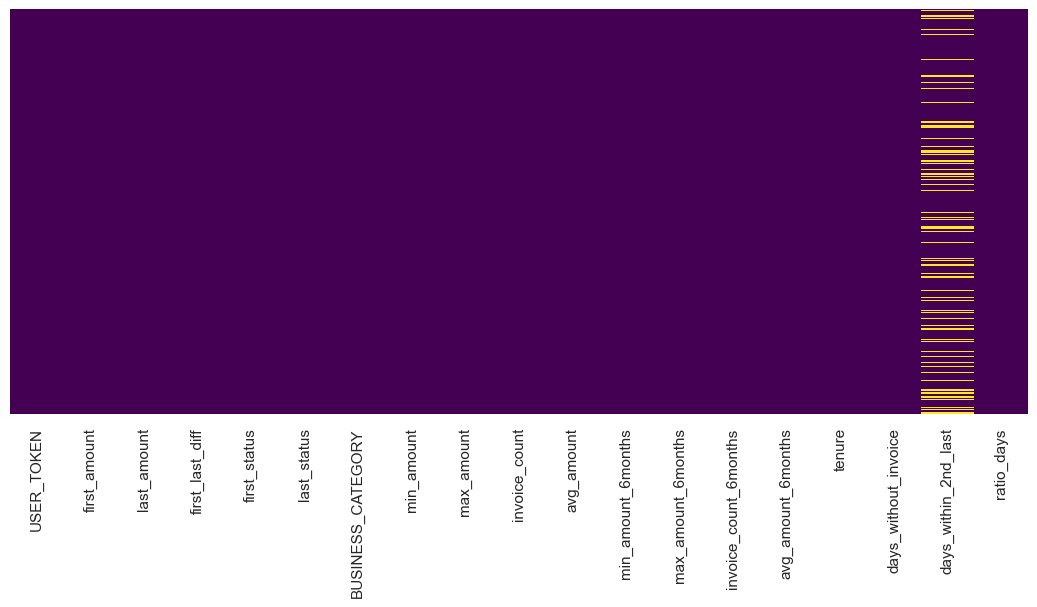

In [206]:
sns.set(rc={'figure.figsize':(11.7,5)})
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [207]:
data2['days_within_2nd_last']=data2['days_within_2nd_last'].fillna(0)

C:\Users\Crediclub\AppData\Local\Temp\ipykernel_14620\630692172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['days_within_2nd_last']=data2['days_within_2nd_last'].fillna(0)


Let's perform label encoding for first_status, last_status, and BUSINESS_CATEGORY

In [208]:
data_fin=pd.get_dummies(data=data2, columns=['first_status', 'last_status', 'BUSINESS_CATEGORY'], dtype=int)
data_fin.head(3)

,USER_TOKEN,first_amount,last_amount,first_last_diff,min_amount,max_amount,invoice_count,avg_amount,min_amount_6months,max_amount_6months,invoice_count_6months,avg_amount_6months,tenure,days_without_invoice,days_within_2nd_last,ratio_days,first_status_CANCELLED,first_status_PAID,first_status_REFUNDED,first_status_UNPAID,last_status_CANCELLED,last_status_PAID,last_status_REFUNDED,last_status_UNPAID,BUSINESS_CATEGORY_beauty_and_personal_care,BUSINESS_CATEGORY_casual_use,BUSINESS_CATEGORY_charities_education_and_membership,BUSINESS_CATEGORY_food_and_drink,BUSINESS_CATEGORY_health_care_and_fitness,BUSINESS_CATEGORY_home_and_repair,BUSINESS_CATEGORY_leisure_and_entertainment,BUSINESS_CATEGORY_professional_services,BUSINESS_CATEGORY_retail,BUSINESS_CATEGORY_transportation
0,00202P61E9TF1,2000,2000,0,1000,6000,50,2394.000000,1000,6000,50,2394.000000,5,87,1.0,87.000000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,002G4N5JGWC45,500,3688,-3188,500,9000,47,2965.212766,500,9000,47,2965.212766,5,79,3.0,26.333333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,00JD7ERNAWZNV,2500,5700,-3200,2500,5700,2,4100.000000,5700,5700,1,5700.000000,19,86,579.0,0.148532,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Let's explore the distribution of days within inovice to create an educated definition of churn

76.0


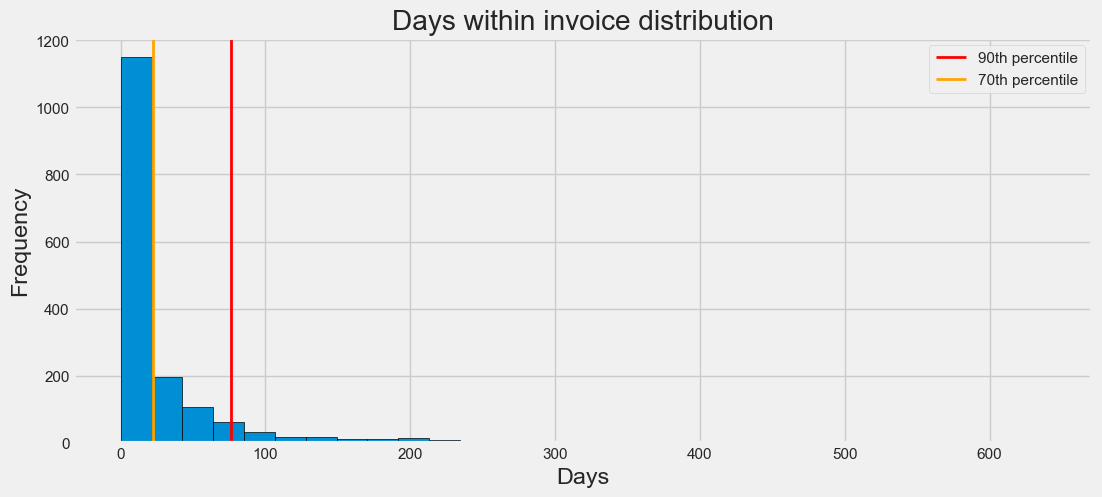

In [209]:
plt.style.use('fivethirtyeight')
plt.hist(data['days_within_2nd_last'], bins=30, edgecolor='black')
plt.title('Days within invoice distribution')
plt.xlabel('Days')
plt.ylabel('Frequency')

#finding the 90th percentile
percentile95=data.days_within_2nd_last.quantile(0.9)
plt.axvline(percentile95,color='red', label='90th percentile', linewidth=2)

#finding the 70th percentile
percentile50=data.days_within_2nd_last.quantile(0.7)
plt.axvline(percentile50,color='orange', label='70th percentile', linewidth=2)
print(percentile95)
plt.legend()

Seeing that 90% of the customers already performed their next invoice within 60 days from the last one, we'll go ahead and define churn as a client who hasn't performed an invoice in the last 60 days. This criteria could be improved if we had more insight from the company, but this is a good place to start.

In [210]:
query_churn='''
with 
last_invoice as (
select USER_TOKEN, last_invoice, last_amount, last_status from (
select USER_TOKEN, SENT_AT as last_invoice, INVOICE_AMOUNT_CENTS as last_amount, INVOICE_STATE as last_status,
row_number() over(partition by USER_TOKEN order by SENT_AT desc) as rk from df
) as first
where rk=1
),
usr_arrival as (
select USER_TOKEN, first_invoice, first_amount, first_status from (
select USER_TOKEN, SENT_AT as first_invoice, INVOICE_AMOUNT_CENTS as first_amount, INVOICE_STATE as first_status,
row_number() over(partition by USER_TOKEN order by SENT_AT asc) as rk from df
) as first
where rk=1
),
user_3months as (
select USER_TOKEN from df
where SENT_AT >= '2017-10-01'
group by USER_TOKEN  
)
select usr.USER_TOKEN, last_invoice from user_3months as usr
left join usr_arrival as usr_a
on usr.USER_TOKEN=usr_a.USER_TOKEN and first_invoice < '2017-10-01'
left join last_invoice as last
on usr.USER_TOKEN=last.USER_TOKEN
'''
data_churn=pysqldf(query_churn)
data_churn['last_invoice']=pd.to_datetime(data_churn['last_invoice'])

from datetime import date

data_churn['today'] = pysqldf('''select max(SENT_AT) as max_date from df''')['max_date'][0]
data_churn['today']=pd.to_datetime(data['today'])

data_churn['days_without_invoice']=(data_churn['today']-data_churn['last_invoice']).dt.days

data_churn['Churn']=np.where(data_churn['days_without_invoice'] >= 60, 1, 0)

target=data_churn[['USER_TOKEN', 'Churn']]

target

,USER_TOKEN,Churn
0,00202P61E9TF1,0
1,002G4N5JGWC45,0
2,00JD7ERNAWZNV,0
3,00KFG18RFH2EC,0
4,012G8WFQ3CT3W,0
...,...,...
1571,ZVACCZT4R0BNC,0
1572,ZZ6GWQ5A0197W,0
1573,ZZS4V94Y0FTE9,0
1574,ZZSNACGS7N1TB,0


In [211]:
query='''
select data_fin.*, Churn from target
inner join data_fin
on target.USER_TOKEN=data_fin.USER_TOKEN
'''
dataset=pysqldf(query).drop(['USER_TOKEN'], axis=1)

dataset

,first_amount,last_amount,first_last_diff,min_amount,max_amount,invoice_count,avg_amount,min_amount_6months,max_amount_6months,invoice_count_6months,avg_amount_6months,tenure,days_without_invoice,days_within_2nd_last,ratio_days,first_status_CANCELLED,first_status_PAID,first_status_REFUNDED,first_status_UNPAID,last_status_CANCELLED,last_status_PAID,last_status_REFUNDED,last_status_UNPAID,BUSINESS_CATEGORY_beauty_and_personal_care,BUSINESS_CATEGORY_casual_use,BUSINESS_CATEGORY_charities_education_and_membership,BUSINESS_CATEGORY_food_and_drink,BUSINESS_CATEGORY_health_care_and_fitness,BUSINESS_CATEGORY_home_and_repair,BUSINESS_CATEGORY_leisure_and_entertainment,BUSINESS_CATEGORY_professional_services,BUSINESS_CATEGORY_retail,BUSINESS_CATEGORY_transportation,Churn
0,2000,2000,0,1000,6000,50,2394.000000,1000,6000,50,2394.000000,5,87,1.0,87.000000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,500,3688,-3188,500,9000,47,2965.212766,500,9000,47,2965.212766,5,79,3.0,26.333333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2500,5700,-3200,2500,5700,2,4100.000000,5700,5700,1,5700.000000,19,86,579.0,0.148532,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,9400,100,9300,100,10382,6,4130.333333,100,2200,2,1150.000000,14,242,0.0,0.000000,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,3000,2000,1000,100,45988,35,12719.114286,2000,45988,18,15635.555556,12,68,0.0,0.000000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1227,2300,2300,0,2300,2300,4,2300.000000,2300,2300,4,2300.000000,0,61,0.0,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1228,250,250,0,100,250,2,175.000000,100,250,2,175.000000,0,66,0.0,0.000000,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1229,9540,7860,1680,2650,14840,15,6939.333333,2650,14840,15,6939.333333,2,121,17.0,7.117647,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1230,4047,2130,1917,2130,13889,8,6179.125000,2130,13889,8,6179.125000,2,64,27.0,2.370370,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [212]:
mean_0=np.mean(dataset[dataset['Churn']==0].days_without_invoice)
mean_1=np.mean(dataset[dataset['Churn']==1].days_without_invoice)
mean_gen=np.mean(dataset.days_without_invoice)
std_0=np.std(dataset[dataset['Churn']==0].days_without_invoice)
std_1=np.std(dataset[dataset['Churn']==1].days_without_invoice)
std_gen=np.std(dataset.days_without_invoice)

print(f'mean_gen: {mean_gen}')
print(f'mean_0: {mean_0}')
print(f'mean_1: {mean_1}')
print(f'std_gen: {std_gen}')
print(f'std_0: {std_0}')
print(f'std_1: {std_1}')

mean_gen: 82.69155844155844
mean_0: 84.35112936344969
mean_1: 76.42635658914729
std_gen: 30.796367114343045
std_0: 34.09101108374784
std_1: 9.576113041789096


In [213]:
mean=np.mean(dataset[dataset['Churn']==1].days_without_invoice)
std=np.std(dataset[dataset['Churn']==1].days_without_invoice)
dataset['days_without_heavy']=np.where((dataset['days_without_invoice']<mean+0.7*std) & (dataset['days_without_invoice']>mean-0.7*std) ,dataset['days_without_invoice']**2,dataset['days_without_invoice'])

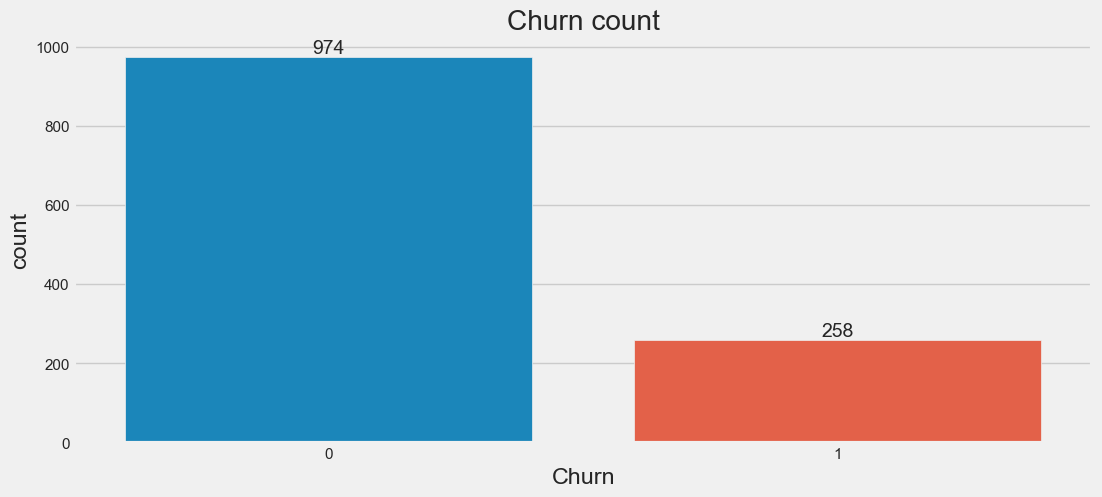

In [214]:
ax=sns.countplot(data=dataset, x='Churn')
ax.bar_label(ax.containers[0])
ax.set_title('Churn count')
plt.show()

# **Feature Exploration**

We have an imbalanced dataset with 17% of positives for Churn. We'll adress this with undersampling the clients with Churn=0 and get this 17% to 30%, but first we want to explore the data generated. We could have decided to over sample the churn examples but since we have a descent amount of training data, undersampling is a safer way to approach this imbalanced dataset.

c:\Users\Crediclub\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


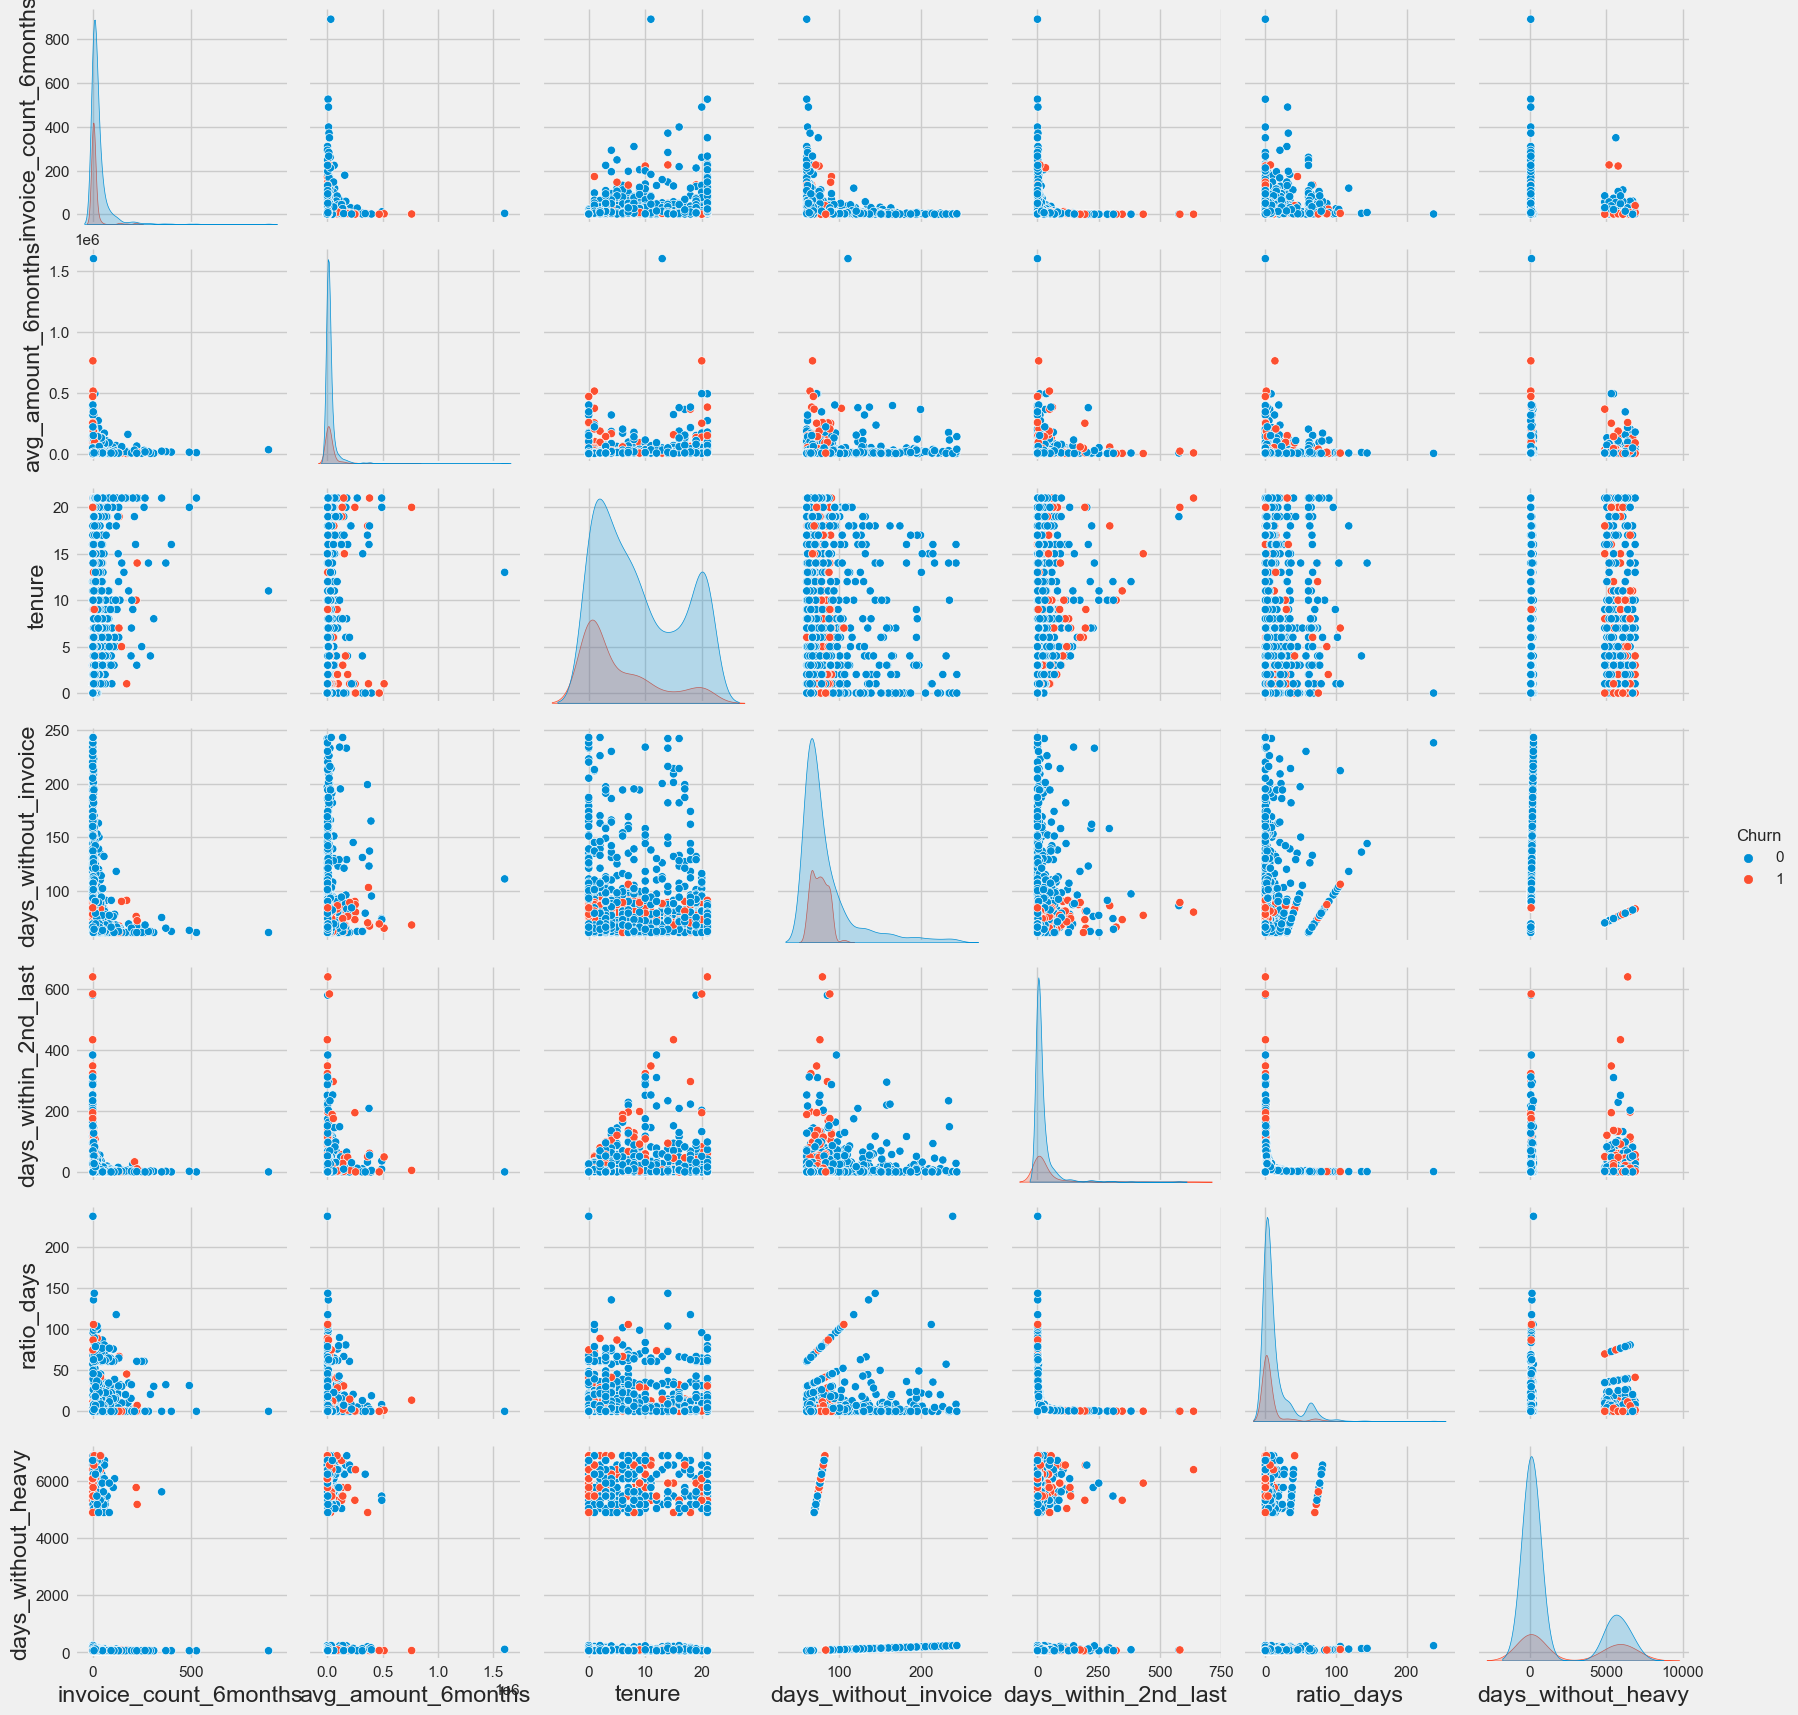

In [215]:
sns.pairplot(data=dataset, vars=[
       'invoice_count_6months', 'avg_amount_6months', 'tenure',
       'days_without_invoice', 'days_within_2nd_last', 'ratio_days','days_without_heavy'], hue='Churn')

<Axes: xlabel='last_status_PAID', ylabel='count'>

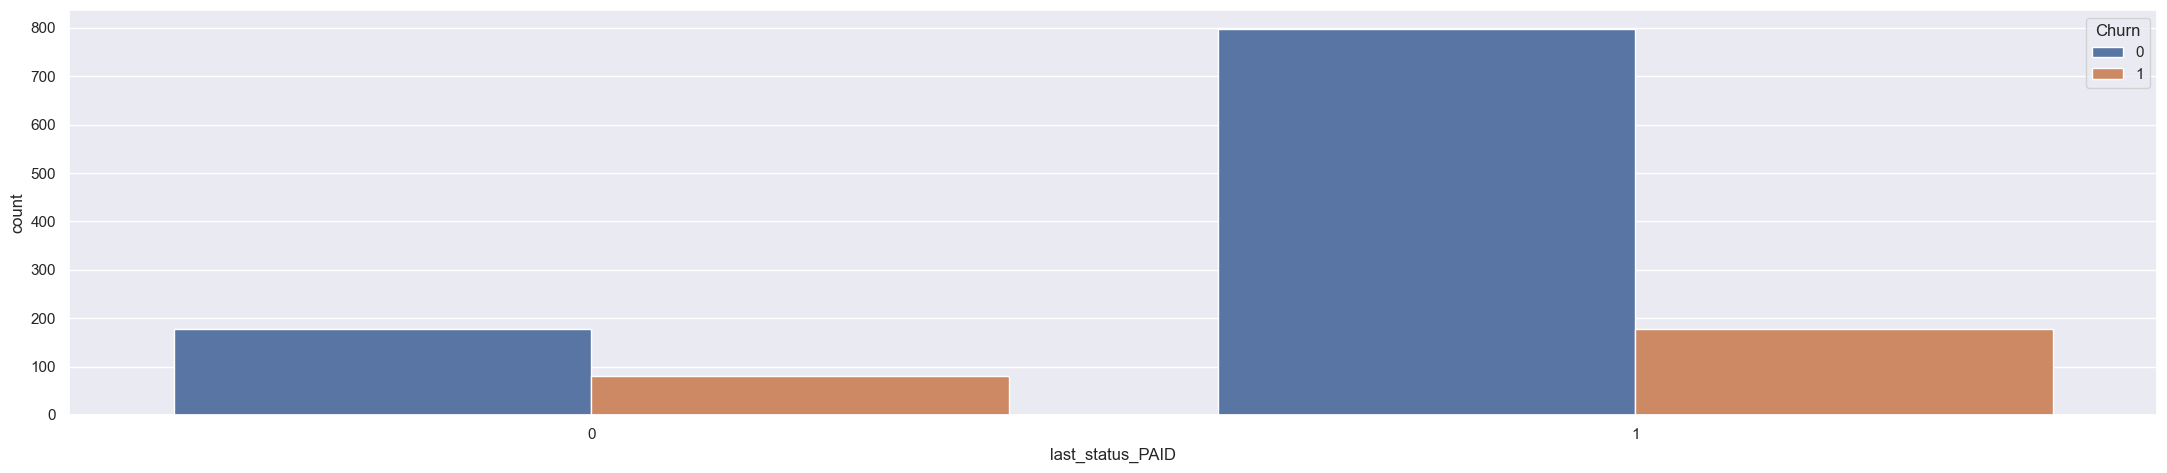

In [216]:
sns.set(rc={'figure.figsize':(24,5)})
sns.countplot(data=dataset, x='last_status_PAID', hue='Churn')

<Axes: xlabel='Churn', ylabel='days_without_invoice'>

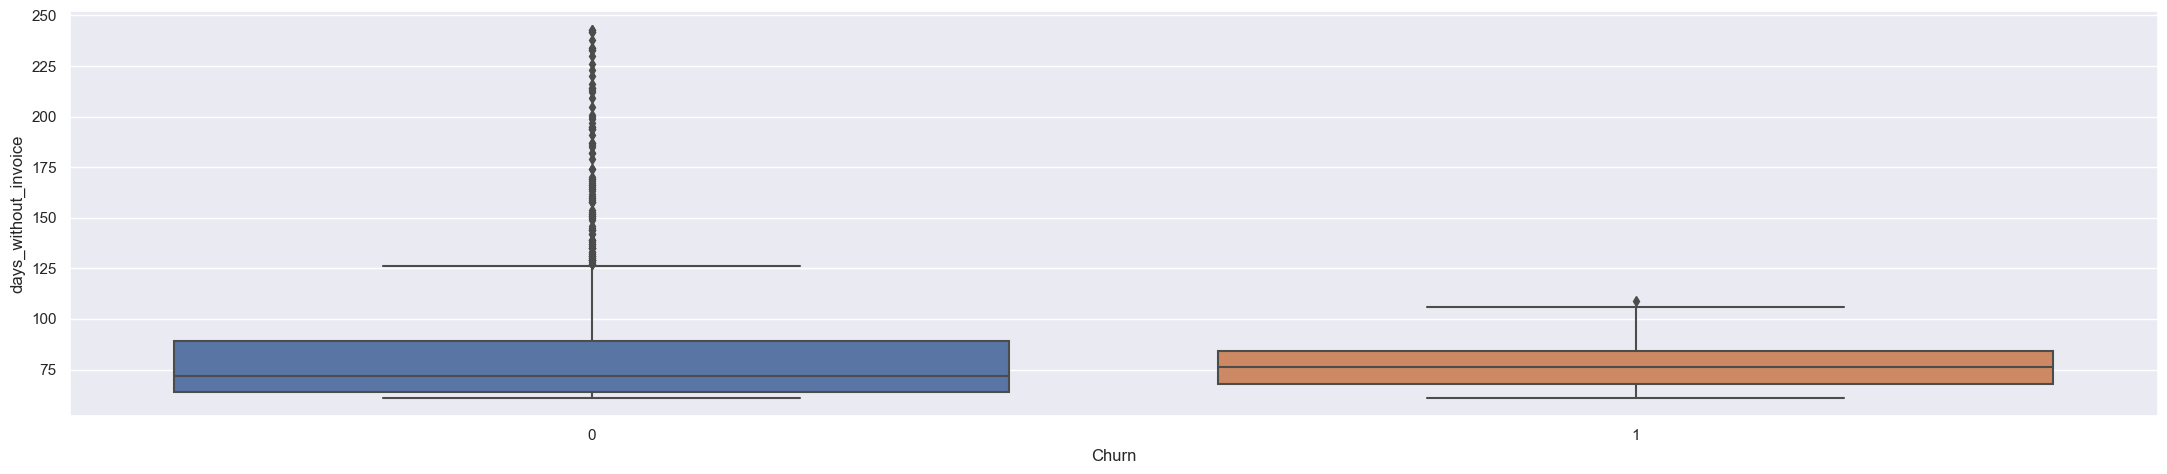

In [223]:
#sns.boxplot(x=dataset["days_without_invoice"])
sns.boxplot(y='days_without_invoice',x = 'Churn',data = dataset)

In [29]:
#dataset=dataset.loc[(dataset['days_without_invoice'] < dataset.days_without_invoice.quantile(0.9)) ].copy()

In [30]:
dataset.describe()

,first_amount,last_amount,first_last_diff,min_amount,max_amount,invoice_count,avg_amount,min_amount_6months,max_amount_6months,invoice_count_6months,avg_amount_6months,tenure,days_without_invoice,days_within_2nd_last,ratio_days,first_status_CANCELLED,first_status_PAID,first_status_REFUNDED,first_status_UNPAID,last_status_CANCELLED,last_status_PAID,last_status_REFUNDED,last_status_UNPAID,BUSINESS_CATEGORY_beauty_and_personal_care,BUSINESS_CATEGORY_casual_use,BUSINESS_CATEGORY_charities_education_and_membership,BUSINESS_CATEGORY_food_and_drink,BUSINESS_CATEGORY_health_care_and_fitness,BUSINESS_CATEGORY_home_and_repair,BUSINESS_CATEGORY_leisure_and_entertainment,BUSINESS_CATEGORY_professional_services,BUSINESS_CATEGORY_retail,BUSINESS_CATEGORY_transportation,Churn
count,1108.000000,1.108000e+03,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1.108000e+03,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,24857.770758,2.875461e+04,-3.896842e+03,7941.473827,1.057746e+05,57.881769,2.702483e+04,9648.042419,8.089157e+04,27.276173,2.795563e+04,8.292419,73.962996,20.253610,11.730750,0.254513,0.684116,0.005415,0.055957,0.116426,0.802347,0.001805,0.079422,0.040614,0.057762,0.034296,0.057762,0.421480,0.043321,0.032491,0.160650,0.143502,0.008123,0.232852
std,65593.490548,1.618623e+05,1.579318e+05,27824.548113,3.023013e+05,131.554281,6.303230e+04,29513.905938,2.351115e+05,54.724633,7.438548e+04,7.379582,12.001938,51.157671,20.121565,0.435784,0.465077,0.073421,0.229942,0.320880,0.398409,0.042467,0.270519,0.197483,0.233398,0.182071,0.233398,0.494019,0.203671,0.177380,0.367373,0.350742,0.089800,0.422840
min,100.000000,1.000000e+02,-4.779008e+06,100.000000,1.000000e+02,1.000000,1.000000e+02,100.000000,1.000000e+02,1.000000,1.000000e+02,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3070.250000,3.100750e+03,-3.003250e+03,1000.000000,1.043575e+04,6.000000,4.849149e+03,1500.000000,9.190250e+03,4.000000,4.728955e+03,2.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6317.500000,6.560000e+03,0.000000e+00,2013.500000,2.289550e+04,20.000000,7.816137e+03,2500.000000,1.865000e+04,10.500000,7.733190e+03,7.000000,71.000000,4.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17525.000000,1.803500e+04,3.000750e+03,4525.000000,7.612500e+04,54.000000,2.385304e+04,6000.000000,6.000000e+04,28.000000,2.343623e+04,15.000000,81.000000,20.000000,11.857143,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,859207.000000,5.000000e+06,8.092070e+05,470000.000000,5.000000e+06,1506.000000,1.150850e+06,470000.000000,5.000000e+06,891.000000,1.602623e+06,21.000000,111.000000,639.000000,106.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We could create a variable that increase he weight of the days_without_invoice by calculating days_without_invoice**2 when the value for the user is 0.5 standard deviations above the mean.

# **Training the model**

We'll use an XGBoostClassifier.

We need to undersample for class Churn=0 in order to have 70% being 0 and 30% being 1.

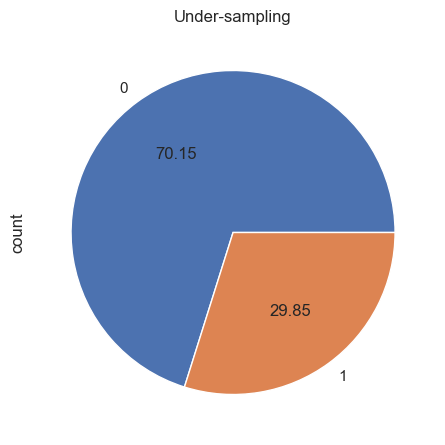

In [144]:
x=dataset.drop(['Churn',
       #'first_status_CANCELLED', 
        #'first_status_PAID', 
        #'first_status_REFUNDED',
       #'first_status_UNPAID', 
       'last_status_CANCELLED', 'last_status_PAID',
       'last_status_REFUNDED', 'last_status_UNPAID',
       'BUSINESS_CATEGORY_beauty_and_personal_care',
       'BUSINESS_CATEGORY_casual_use',
       'BUSINESS_CATEGORY_charities_education_and_membership',
       'BUSINESS_CATEGORY_food_and_drink',
       'BUSINESS_CATEGORY_health_care_and_fitness',
       'BUSINESS_CATEGORY_home_and_repair',
       'BUSINESS_CATEGORY_leisure_and_entertainment',
       'BUSINESS_CATEGORY_professional_services', 'BUSINESS_CATEGORY_retail',
       'BUSINESS_CATEGORY_transportation',
       'days_without_heavy'], axis=1)
y=dataset.Churn

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state=4)

rus= RandomUnderSampler(sampling_strategy=0.425)

x_res, y_res=rus.fit_resample(x_train,y_train)

ax=y_res.value_counts().plot.pie(autopct='%.2f')
ax.set_title('Under-sampling')
plt.show()

In [145]:
from xgboost import XGBClassifier
import xgboost as xgb

model=XGBClassifier(eta=0.1, max_depth=10, n_estimators=500)

model.fit(x_res, y_res)

predictions=model.predict(x_test)

# **Model Evaluation**

In [146]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

model.score(x_test,y_test)

0.8324324324324325

In [147]:
confusion_matrix(y_test,predictions)

array([[267,  25],
       [ 37,  41]], dtype=int64)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

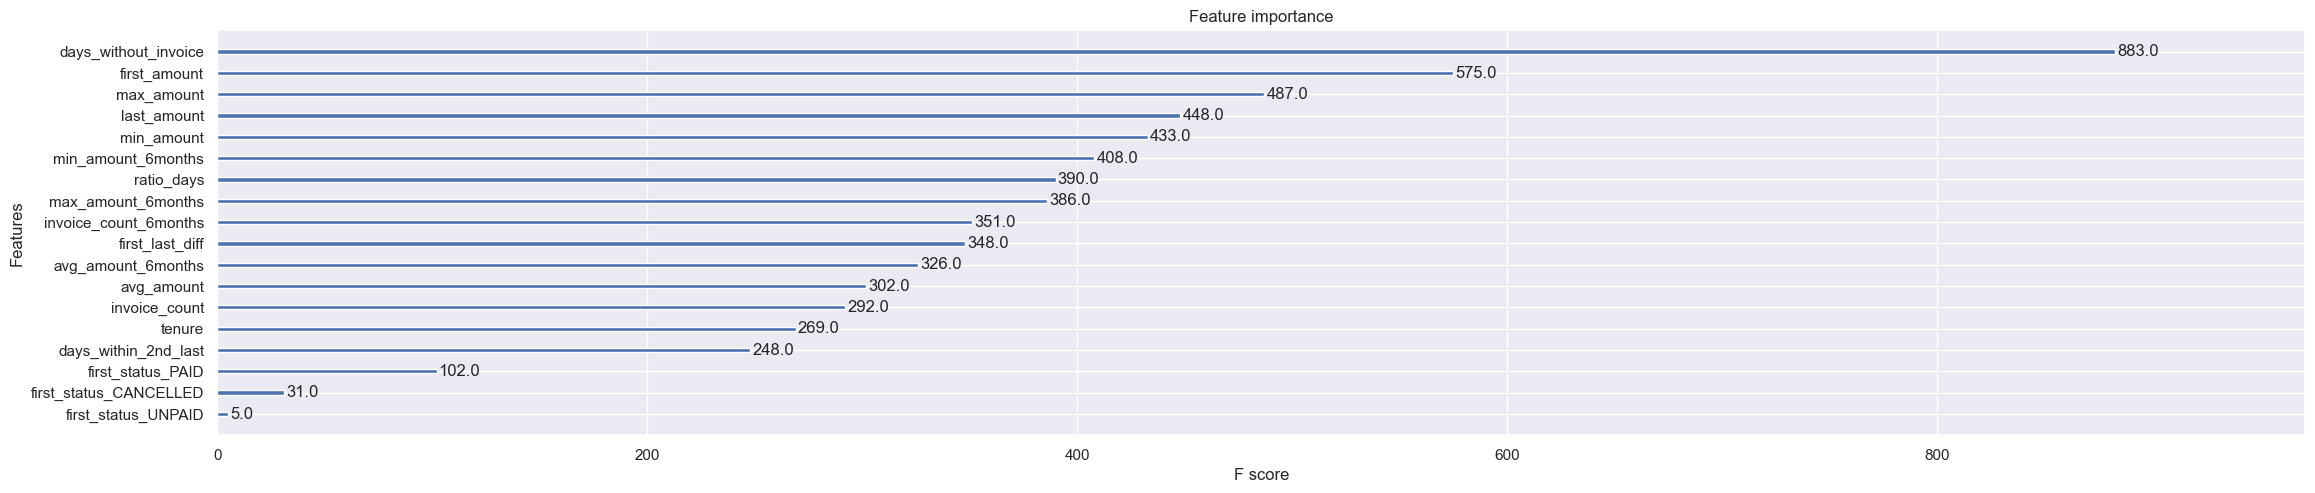

In [148]:
xgb.plot_importance(model, ax=plt.gca())

PRECISION=TP/(TP+FP) positive predicitve value

RECALL=TP/(TP+FN) true positive rate

In [151]:
tp=confusion_matrix(y_test,predictions)[0][0]
fn=confusion_matrix(y_test,predictions)[1][0]
tn=confusion_matrix(y_test,predictions)[1][1]
fp=confusion_matrix(y_test,predictions)[0][1]

precison=tp/(tp+fp)
recall=tp/(tp+fn)

print(f'precision: {precison}')
print(f'recall: {recall}')

precision: 0.9143835616438356
recall: 0.8782894736842105


For this particular classification problem, in which predicting the true positives is what's most important to us, **recall** is the evaluation metric of interest. We reached a recall of 87%, not bad at all. To improve this we could play with the undersampling criteria and perform cross validation techniques to make sure the model generalizes well to new data.